In [1]:
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter

# %matplotlib qt-

# import module with layers
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/model_module")

from adaptive_layer import *

In [2]:
tf.random.set_seed(5)
np.random.seed(5)

In [3]:
def illustrate_train(name, y_label, adaptive_nn, adaptive_conv_nn):
    epochs = range(1, len(adaptive_nn)+1)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot()
    plt.title(name, fontsize="xx-large")

    ax.set_ylabel(y_label, fontsize="large")
    ax.set_xlabel('Epochs', fontsize="large")

    ax.plot(epochs, adaptive_nn, label='Adaptive NN')
    ax.plot(epochs, adaptive_conv_nn, label='Adaptive Conv NN')

    ax.legend()
    
    plt.grid()
    plt.show()

In [4]:
def illustrate_activation(name, x, y_before, y_after):
    figure, axis = plt.subplots(len(y_before), 2)

    figure.set_size_inches(12, 12)

    # figure.set_size_inches(10, 8)

    plt.figtext(0.4, 0.94, name, fontsize="xx-large")
    plt.figtext(0.23, 0.9, 'Before training', fontsize="x-large")
    plt.figtext(0.66, 0.9, 'After training', fontsize="x-large")

    for i in range(len(y_before)):
        axis[i][0].plot(x, y_before[i])
        axis[i][1].plot(x, y_after[i])

        axis[i][0].set_xlabel('x')
        axis[i][0].set_ylabel('y')
        axis[i][1].set_xlabel('x')
        axis[i][1].set_ylabel('y')

    plt.show()

In [5]:
def illustrate_test(name, static_f, adaptive_f, adaptive_nn, adaptive_conv_nn):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot()
    
    x = ["Static Function", "Adaptive Function", "Adaptive NN", "Adaptive Conv NN"]
    y = [static_f, adaptive_f, adaptive_nn, adaptive_conv_nn]
    
    plt.title(name, fontsize="xx-large")
    ax.set_ylabel("Accuracy", fontsize="large")
    
    ax.bar(x, y)
    
    plt.grid()
    plt.show()

In [6]:
# dataset

data = pd.read_csv('../datasets/sonar_data.csv')
data = pd.DataFrame(data).to_numpy()
np.random.shuffle(data)

x = data[:, :-1]
y = data[:, -1]

x = np.array(x, dtype=np.float32)
y = np.array([out == 'M' for out in (y)], dtype=np.float32)

x_train, x_test = x[:160, :], x[160:, :]
y_train, y_test = y[:160], y[160:]

y_train = tf.constant(y_train, shape=(y_train.shape[0], 1))
y_test = tf.constant(y_test, shape=(y_test.shape[0], 1))

In [7]:
EPOCHS = 200
name = "Sonar Binary Classification"

# measurement repetitions
flag = measurements = 1

adaptive_nn_hist = np.zeros(shape=[2, EPOCHS])
adaptive_conv_nn_hist = np.zeros(shape=[2, EPOCHS])

adaptive_nn_test = 0
adaptive_conv_nn_test = 0

In [8]:
# Adaptive Layer
adaptive_nn_model = AdaptiveModel([
    AdaptiveLayer(5, structure=[2, 1], skip_w=0.1, 
                 inner_hidden_activation=tf.nn.leaky_relu, inner_out_activation=tf.sin),
    AdaptiveLayer(1, structure=[2, 1], skip_w=0.1,
                 inner_hidden_activation=tf.nn.tanh, inner_out_activation=tf.nn.sigmoid)
])

print("Initialization is done successfully")

adaptive_nn_model.compile(optimizer=tf.optimizers.legacy.Adam(learning_rate=0.003), 
                       loss="binary_crossentropy", metrics=['accuracy'])

print("Compilation is done successfully")

Initialization is done successfully
Compilation is done successfully


In [9]:
# Adaptive Layer based on 1D Conv
adaptive_conv_nn_model = AdaptiveModel([
    AdaptiveLayerConv(5, structure=[2, 4], split=3, skip_w=0, noise=0, 
                      inner_hidden_activation=tf.nn.leaky_relu, inner_out_activation=tf.sin),
    AdaptiveLayerConv(1, structure=[2, 4], skip_w=0, noise=0, 
                      inner_hidden_activation=tf.nn.tanh, inner_out_activation=tf.nn.sigmoid)
])

print("Initialization is done successfully")

adaptive_conv_nn_model.compile(optimizer=tf.optimizers.legacy.Adam(learning_rate=0.003), 
                       loss="binary_crossentropy", metrics=['accuracy'])

print("Compilation is done successfully")

Initialization is done successfully
Compilation is done successfully


In [10]:
o1 = adaptive_nn_model(x_test)
print(f"Model 1 : Input shape {x_test.shape}, Output shape : {o1.shape}")
o2 = adaptive_conv_nn_model(x_test)
print(f"Model 2 : Input shape {x_test.shape}, Output shape : {o2.shape}")

Model 1 : Input shape (47, 60), Output shape : (47, 1)
Model 2 : Input shape (47, 60), Output shape : (47, 1)


In [11]:
x = np.arange(-5, 5.1, 0.1)
y_adaptive_nn_before = adaptive_nn_model.activation_show(x)
y_adaptive_conv_nn_before = adaptive_conv_nn_model.activation_show(x)

In [12]:
hist = adaptive_nn_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4500
Epoch 2/200
3/3 [==============================] - 0s 925us/step - loss: 0.6925 - accuracy: 0.5375
Epoch 3/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5125
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5125
Epoch 5/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5125
Epoch 6/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5125
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5125
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5125
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5375
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6438
Epoch 11/200
3/3 [=========

In [13]:
adaptive_nn_hist[0][:] = np.array(hist.history["loss"])/measurements
adaptive_nn_hist[1][:] = np.array(hist.history["accuracy"])/measurements

In [14]:
hist = adaptive_conv_nn_model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

Epoch 1/200
3/3 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4375
Epoch 2/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4875
Epoch 3/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5125
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5125
Epoch 5/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5125
Epoch 6/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5125
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5125
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5125
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5125
Epoch 10/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5125
Epoch 11/200
3/3 [===========

In [15]:
adaptive_conv_nn_hist[0][:] = np.array(hist.history["loss"])/measurements
adaptive_conv_nn_hist[1][:] = np.array(hist.history["accuracy"])/measurements

In [16]:
adaptive_nn_test = adaptive_nn_model.evaluate(x_test, y_test)[1]/measurements

2/2 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8511


In [17]:
adaptive_conv_nn_test = adaptive_conv_nn_model.evaluate(x_test, y_test)[1]/measurements

2/2 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8298


In [18]:
print("\nAdaptive NN model\nTest accuracy : ", adaptive_nn_test)
print("\nAdaptive Conv NN model\nTest accuracy : ", adaptive_conv_nn_test)


Adaptive NN model
Test accuracy :  0.8510638475418091

Adaptive Conv NN model
Test accuracy :  0.8297872543334961


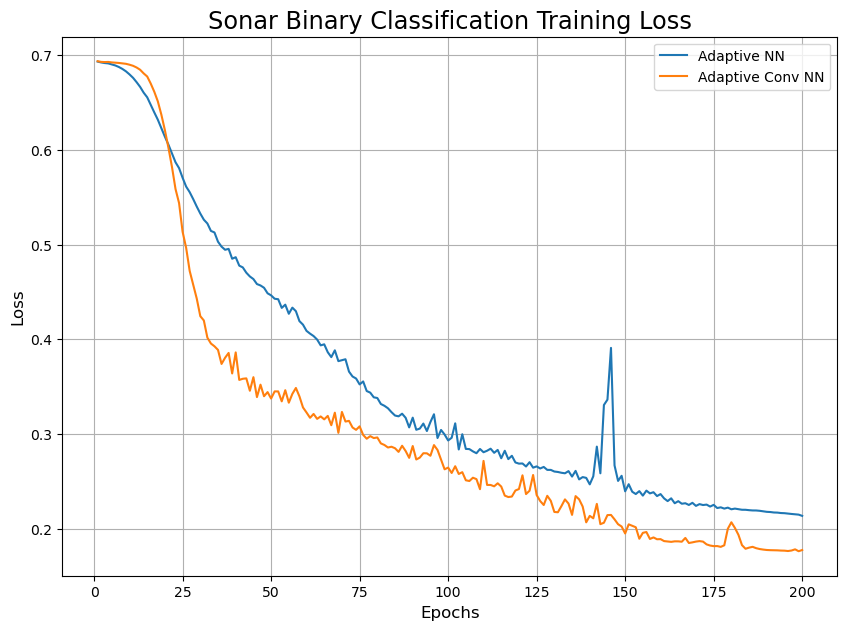

In [19]:
illustrate_train(name+" Training Loss", "Loss", adaptive_nn_hist[0][:], adaptive_conv_nn_hist[0][:])

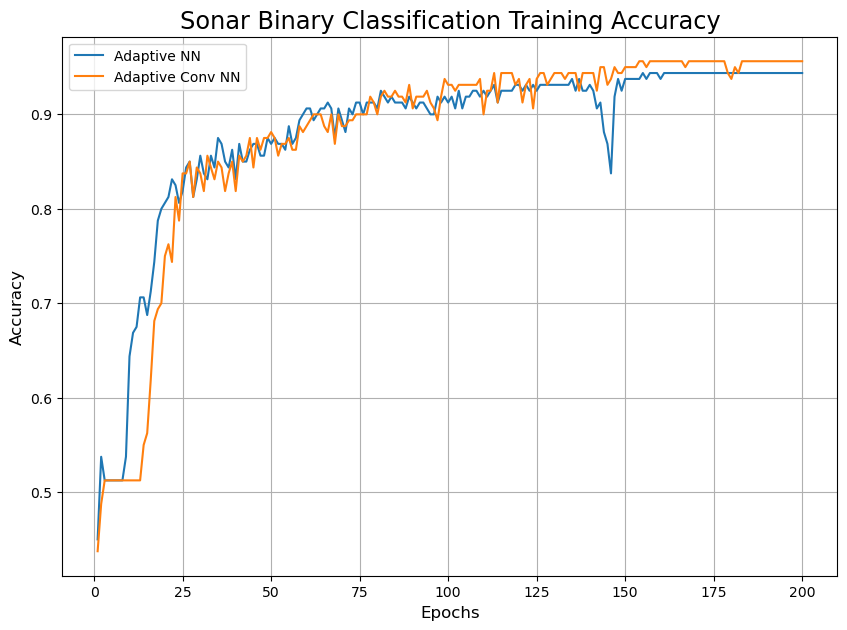

In [20]:
illustrate_train(name + " Training Accuracy", "Accuracy", adaptive_nn_hist[1][:], adaptive_conv_nn_hist[1][:])

In [21]:
y_adaptive_nn_after = adaptive_nn_model.activation_show(x)
y_adaptive_conv_nn_after = adaptive_conv_nn_model.activation_show(x)

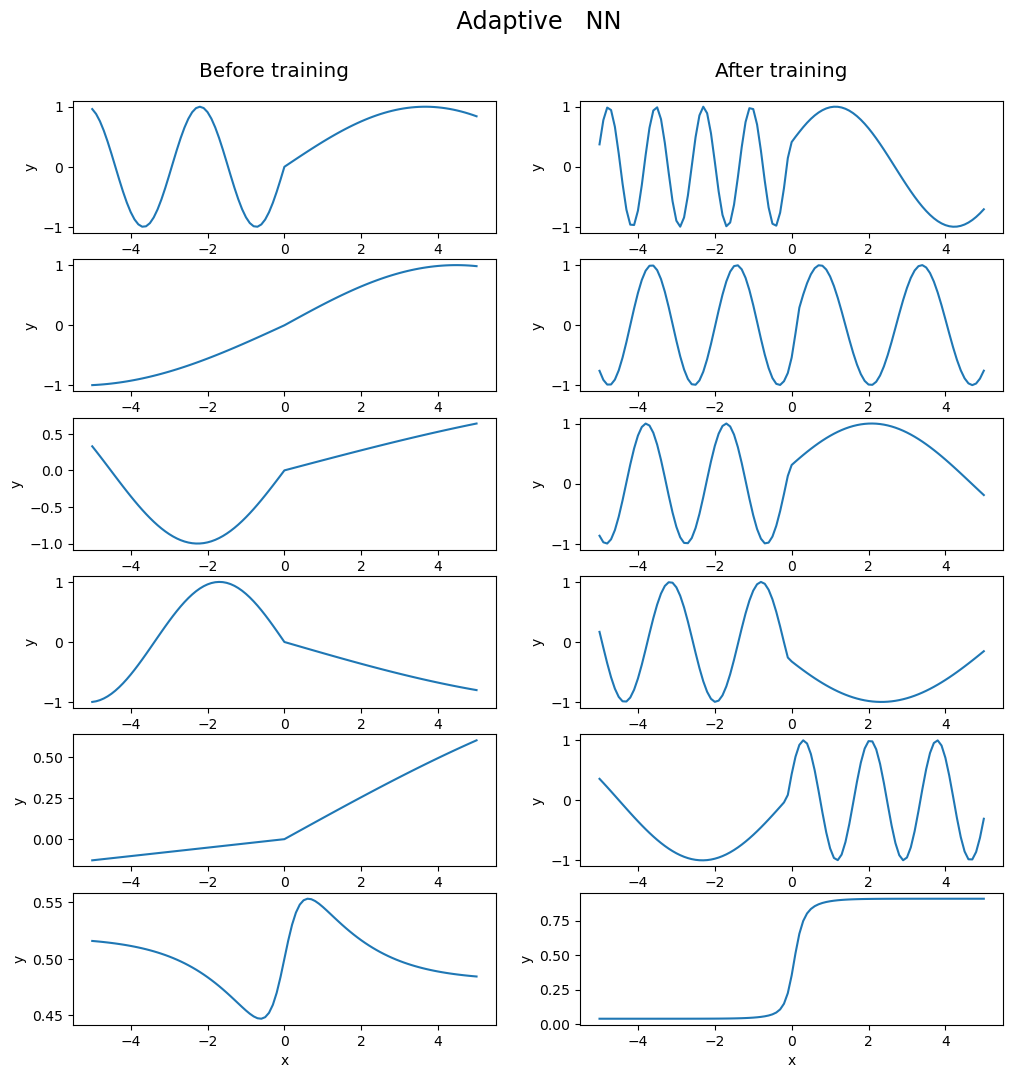

In [22]:
illustrate_activation("       Adaptive   NN", x, y_adaptive_nn_before, y_adaptive_nn_after)

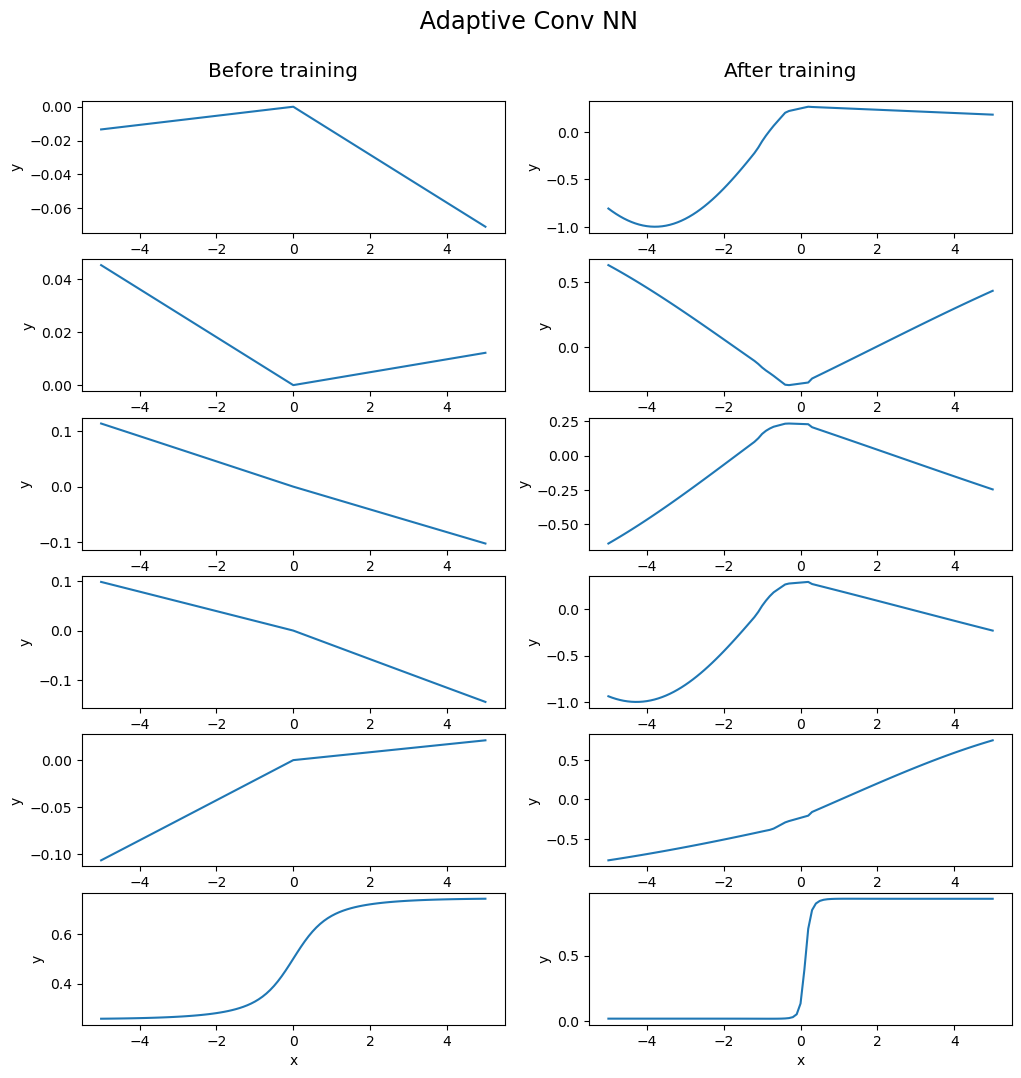

In [23]:
illustrate_activation(" Adaptive Conv NN", x, y_adaptive_conv_nn_before, y_adaptive_conv_nn_after)